### setup
Please make sure you folder looks like this:
- this notebook
- exercise_utils.py
- data_*.csv

Download these files from:
https://gitlab.com/rmenke/ds_at_bc

# Exercise
The exercise will attempt to convey important skills and concepts in applying data science in a production environment.
- Thinking about the data
 - what is it like and what could I do with it?
 - what is the business objective?
- Generating value from ML:
 - establishing a baseline
 - improving as required
 
 ## The challange that you have been set:
You are part of a fast growing social media startup HypeVentures that provides chat and discussion space technology to other startup to improve the customer engagement with the content the users post. Management has hired you to sort out their marketing messaging as the last marketing guy quit and they intend to hire a bunch of different topic experts to deal with the different forums.
 

1. What do people talk about?
2. Can we cluster the conversation topics?
3. Can we label some of them by hand?
4. Use that to label the rest?
5. Classify some new incomming data?

### Let's start with clustering some sample data
- investigate how well clustering works on this data
- Cluster data that has been labeled, so we can evaluate the quality of the results
- Once successfull we'll go and tell our boss to stof paying amazon for labeling services and jsut do everthing with clustering

In [1]:
# Imports we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklean features
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer

Data ingress
load 'data_comp.graphics_sci.med_categories_train.csv' into a pandas dataframe and inspect it

In [129]:
# df2 = pd.read_csv('data_alt.atheism_soc.religion.christian_categories_train.csv')
df2 = pd.read_csv('data_comp.graphics_sci.med_categories_train.csv')

df2 = df2.dropna()#.head(1000)
df2.head()

subject                                               data       category
0        0  Hi,\n\nwell I have opened up a FTP site for ge...  comp.graphics
1        1  \nIt isn't that rare, actually.  Many cases th...        sci.med
2        0  \n\nThe equation of the sphere through the 4 p...  comp.graphics
3        1  Thanks to all those who responded to my origin...        sci.med
5        1  \nCandida albicans can cause severe life-threa...        sci.med

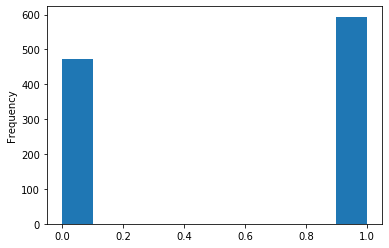

In [100]:
df2[['data', 'subject']].subject.plot(kind='hist')
plt.show()

Vectorize the text data 

1. Either using a counting vectorizer 
2. or a hashing one

Using english default stop words:
stop words are words like: and, to, I etc. Complete list for a common usecase: https://gist.github.com/sebleier/554280

## NLP

- statistical analysis of documents (distributional semantics)
- word2vec
- doc2vec
- named entity recognition


We'll be using simple statistical methods to get started.

*Remember setting a baseline*

### Count the word occurances

Get the words in a string and assign a value. Do until complete: [Example](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

We use the CountVectorizer from sklearn.feature_extraction.text

In [142]:
# Example
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), index=corpus )

and  document  first  is  one  second  \
This is the first document.              0         1      1   1    0       0   
This document is the second document.    0         2      0   1    0       1   
And this is the third one.               1         0      0   1    1       0   
Is this the first document?              0         1      1   1    0       0   

                                       the  third  this  
This is the first document.              1      0     1  
This document is the second document.    1      0     1  
And this is the third one.               1      1     1  
Is this the first document?              1      0     1

Now the same thing with stop words:

In [143]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), index=corpus )

document  second
This is the first document.                   1       0
This document is the second document.         2       1
And this is the third one.                    0       0
Is this the first document?                   1       0

In [102]:
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(df2.data)

In [103]:
pd.Series(count_vect.vocabulary_).sort_values(ascending =False)

zus             15399
zur             15398
zues            15397
zorasterism     15396
zoo             15395
zombie          15394
zoerasterism    15393
zlumber         15392
zionist         15391
zion            15390
zillions        15389
zilch           15388
zeroed          15387
zero            15386
zeke            15385
zeitschrift     15384
zeitgeist       15383
zeit            15382
zechariah       15381
zech            15380
zebras          15379
zebedee         15378
zealous         15377
zealand         15376
zeal            15375
zc              15374
zazen           15373
zara            15372
zakat           15371
zach            15370
                ...  
110                29
11                 28
10yo               27
10th               26
1080               25
1070               24
106                23
10368              22
103                21
101                20
10000              19
1000               18
100                17
10                 16
0908      

In [104]:
X_train_counts

<1066x15400 sparse matrix of type '<class 'numpy.int64'>'
	with 77838 stored elements in Compressed Sparse Row format>

- latent semantic analysis
- Normalize the data

In [105]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

In [137]:
svd = TruncatedSVD(n_components=10,  random_state=42)
X_reduced = svd.fit_transform(X_train_counts)

norm = Normalizer()
X_2 = norm.fit_transform(X_reduced)

In [138]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))


Explained variance of the SVD step: 46%


# Clustering
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). [wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
 
## Different methods 
There are many methods, with different strengths and weaknesses and applications. 
- Centroid-based clustering
 - The most common technique is k-means clustering. 
 - specify the number of clusters
 - difficult to find the correct number if unknown
 - non deterministic
 - scales badly

- Distribution-based clustering
 - Assumes a distribution on the data (Gausian)

- Density-based clustering
 - Popular algos are DBSCAN and OPTICS
 
- Hierarchical clustering
 - Good for data that can be spit with a dendogram


### No one method to rule them all

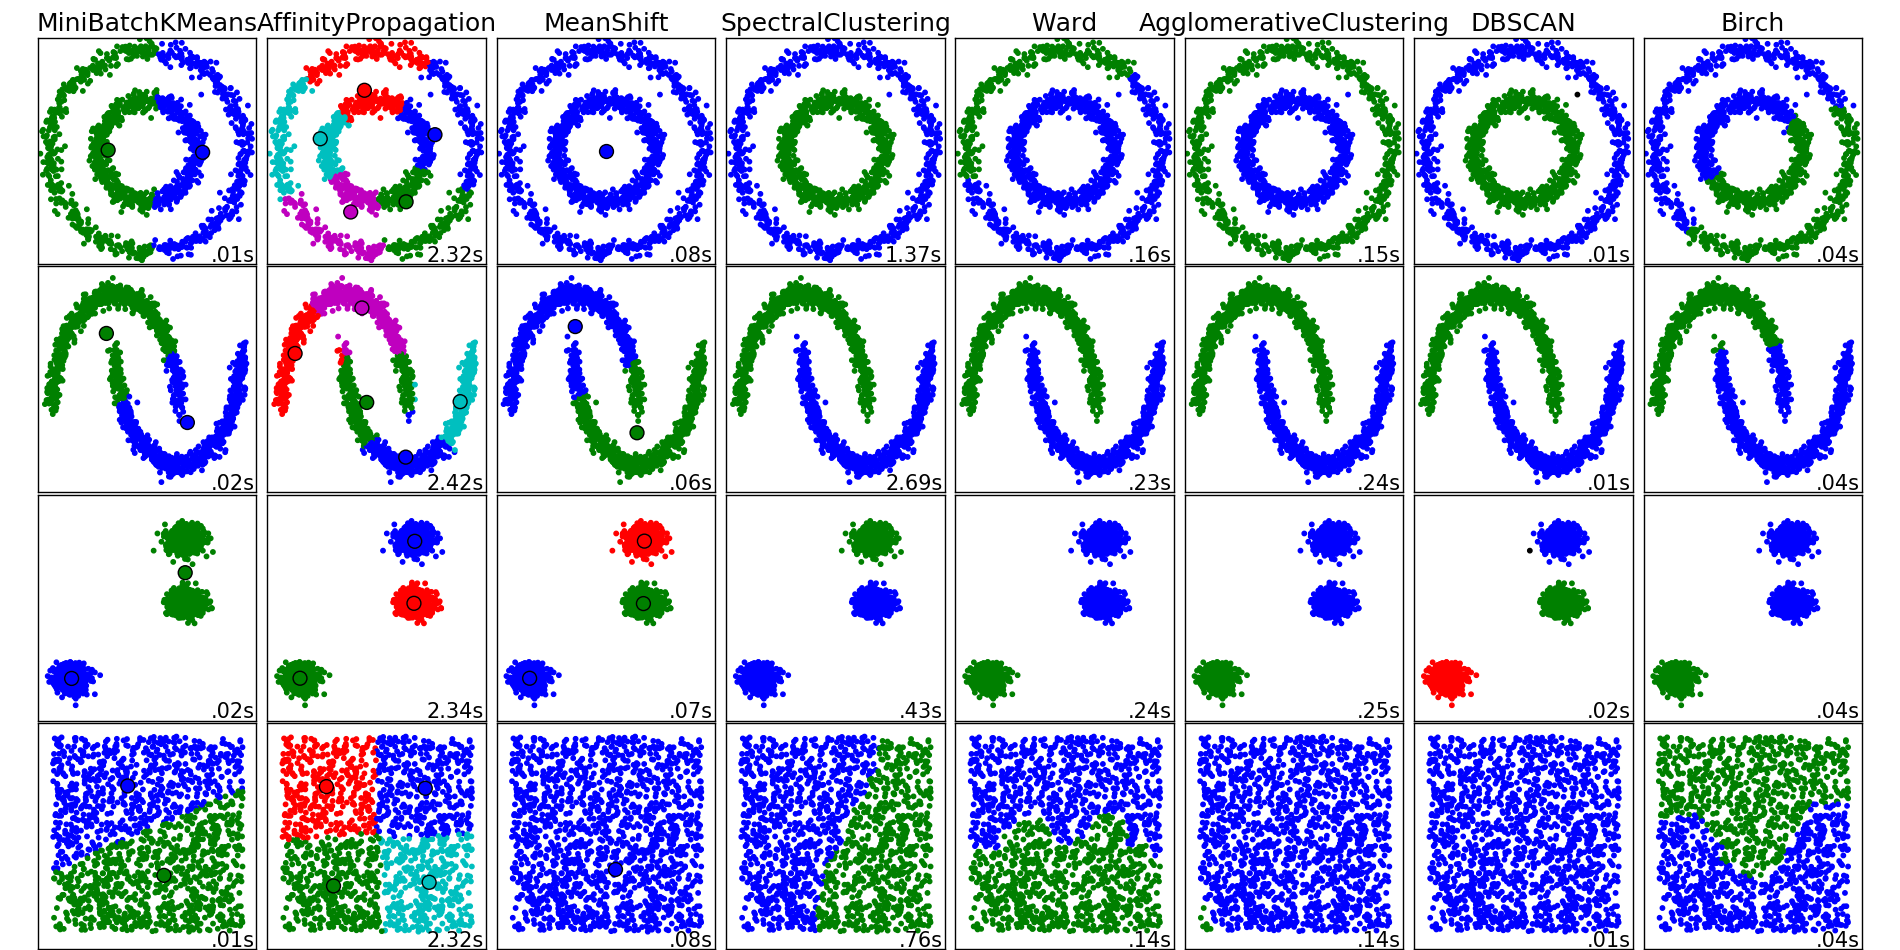

In [139]:
from sklearn.cluster import DBSCAN, Birch, SpectralClustering, MeanShift, AffinityPropagation, KMeans#, OPTICS 
from exercise_utils import match_labels, eval_clustering

In [140]:
clustering = Birch()
#clustering = AffinityPropagation()
clustering.fit(X_2)
y_pred = match_labels(df2.subject.values,clustering.labels_ )
np.mean(df2.subject.values == y_pred)
#set(clustering.labels_)

C:\Users\rum\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


0.0

In [141]:
clustering = DBSCAN(eps=0.9)
clustering.fit(X_2)
set(clustering.labels_)

#y_pred = match_labels(df2.subject.values,clustering.labels_ )
# np.mean(df.subject.values == y_pred)

{0, 1}

0.5206378986866792


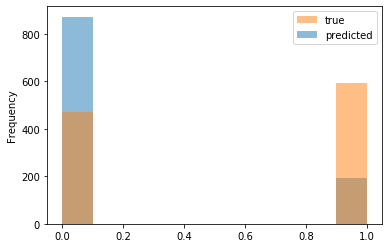

In [126]:
clustering = SpectralClustering(n_clusters=2, random_state=42 )
clustering.fit(X_2)
y_pred = match_labels(df2.subject.values,clustering.labels_ )
print(np.mean(df2.subject.values == y_pred))
plt.hist(clustering.labels_,alpha=0.5)
df2.subject.plot(kind='hist', alpha=0.5)
plt.legend(['true','predicted'])
plt.show()


In [127]:
clustering = KMeans(n_clusters=2,  n_jobs=-1, init='k-means++', random_state=42, max_iter=500)
clustering.fit(X_2)
y_pred = match_labels(df2.subject.values, clustering.labels_ )
np.mean(df2.subject.values == y_pred)

0.5403377110694184

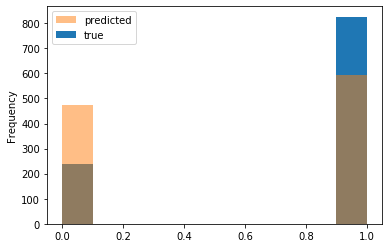

In [128]:
plt.hist(clustering.labels_)
df2.subject.plot(kind='hist', alpha=0.5)
plt.legend(['predicted','true'])
plt.show()


## Success
That looks pretty good!

Let's expand this to four categories.

In [49]:
df4 = pd.read_csv('data_comp.graphics_sci.med_alt.atheism_soc.religion.christian_categories_train.csv')
df4 = df4.dropna()
df4.head()

subject                                               data  \
0        3  \nJohn, \n\nWhile I will not take the time to ...   
1        3  \n\nGifts of the Spirit should not be seen as ...   
2        2  \n\nI recall reading in the recently revised e...   
3        3  [deletia- sig]\n\n[deletia- formalities]\n\nI ...   
4        0  \n\nYou misrepresent me, Selim.  The hard evid...   

                 category  
0  soc.religion.christian  
1  soc.religion.christian  
2                 sci.med  
3  soc.religion.christian  
4             alt.atheism

In [67]:
X_train_counts = count_vect.fit_transform(df4.data)
svd = TruncatedSVD(n_components=40, random_state=42)
X_reduced = svd.fit_transform(X_train_counts)


norm = Normalizer()
X_4 = norm.fit_transform(X_reduced)

In [68]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))


Explained variance of the SVD step: 72%


In [69]:
clustering = KMeans(n_clusters=4,  n_jobs=-1, init='k-means++', random_state=42, max_iter=500)
clustering.fit(X_4)
y_pred = match_labels(df4.subject.values,clustering.labels_ )
np.mean(df4.subject.values == y_pred)
    

0.5686627645204863

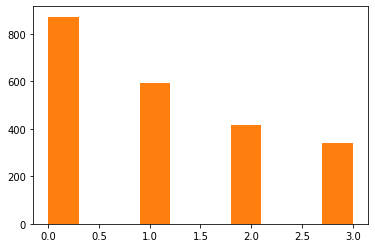

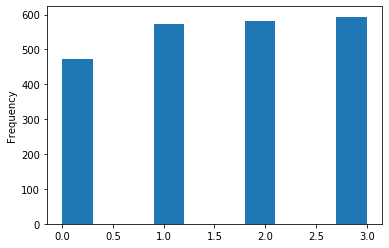

In [70]:
plt.hist(clustering.labels_)
plt.hist(clustering.labels_)
plt.show()
df4.subject.plot(kind='hist')
plt.show()

In [71]:
results = pd.DataFrame(data=[df4.subject.values, clustering.labels_], index=["labeled","guessed"]).T
results.groupby("labeled")["guessed"].mean()

labeled
0    0.745763
1    1.512238
2    0.626072
3    1.456229
Name: guessed, dtype: float64

In [72]:
results.groupby("labeled")["guessed"].median()

labeled
0    0
1    2
2    1
3    1
Name: guessed, dtype: int64

In [73]:
y_pred = match_labels(df4.subject.values, clustering.labels_ )
np.mean(df4.subject.values == y_pred)


0.5686627645204863

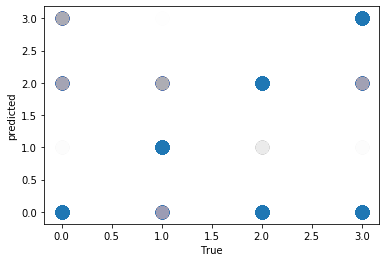

In [74]:
plt.scatter(df4.subject.values , y_pred, alpha=0.005, s=200)
plt.ylabel("predicted")
plt.xlabel("True")
plt.show()


## Lessons learnt
- Humble pie
 - unlabled data is hard (unsupervised learning)
 - human labeling is extremely valuable
 - Always check your work
- Curse of dimensionality 

# Bonus material

In [26]:
# Hashing Vectorizer
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = HashingVectorizer(n_features=100, alternate_sign=False)
X = vectorizer.fit_transform(corpus)
print("Shape:", X.shape)
print("Features:",X.toarray())

Shape: (4, 100)
Features: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.4472136  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.4472136  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.4472136  0.         0.         0.         0.         0.4472136
  0.         0.         0.         0.         0.4472136  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.   